In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


PRODUCT RECOMMENTATION BASED ON VISIUAL SIMILARITY

The goal of this experiment is to make a very basic recommender system: for a given fashion product, we want to recommend products that look similar.

List item
List item
This kind of recommender system is often used when browsing shopping websites. They usually appear on product pages as a "you may also like" section.

The idea behind this recommender system is simple: if a customer is showing interest towards a product by browsing its page, he may also be interested by products that are similar.

# New Section

IMPORT AND PARAMETERS SETUP

In [ ]:
# prompt: IMPORT AND PARAMETERS SETUP

# Import libraries
import os
import cv2
import numpy as np
from PIL import Image
from sklearn.neighbors import NearestNeighbors

# Define parameters
data_dir = '/content/drive/My Drive/fashion-dataset'  # Path to the dataset
image_size = (128, 128)  # Size of the images


In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
# imports
from keras.applications import vgg16
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from keras.applications.imagenet_utils import preprocess_input

from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


In [ ]:
import imageio
from keras.models import Model
from keras.applications import vgg16
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps, ImageFilter
import scipy.ndimage as ndi
from sklearn.metrics import classification_report, confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing import image
from keras.utils import plot_model

In [ ]:
# parameters setup

imgs_path = "/content/drive/MyDrive/products/products/pro/style"
imgs_model_width, imgs_model_height = 224,224

nb_closest_images = 5 # number of most similar images to retrieve

LOAD THE VGG PRE-TRAINED MODEL FROM KERAS.
Keras module contains several pre-trained models that can be loaded very easily.

For our recommender system based on visual similarity, we need to load a Convolutional Neural Network (CNN) that will be able to interpret the image contents.

In this example we will load the VGG16 model trained on imagenet, a big labeled images database.

If we take the whole model, we will get an output containing probabilities to belong to certain classes, but that is not what we want.

We want to retrieve all the information that the model was able to get in the images.

In order to do so, we have to remove the last layers of the CNN which are only used for classes predictions./

In [ ]:
# load the model
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)

# print the layers of the CNN
feat_extractor.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
import glob

# Define the directory containing the images
imgs_path = '/content/drive/MyDrive/products/products/pro/style'

# Find all the files with the extension `.png` in the directory
files = glob.glob(imgs_path + "/*.png")

# Print the number of images
print("number of images:", len(files))

number of images: 2204


In [ ]:
import glob
import os

files = [file for file in glob.glob(os.path.join(imgs_path, "*.png"))]

print("number of images:", len(files))


number of images: 2204


In [ ]:
!pip install pillow
from PIL import Image

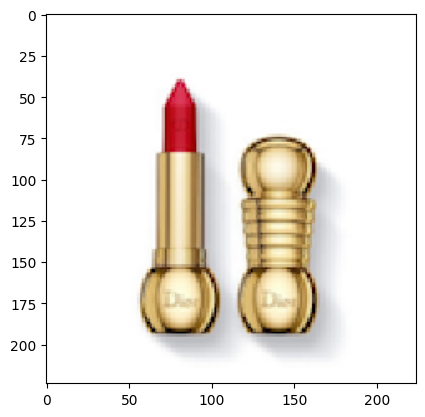

image loaded successfully!


In [ ]:
# load an image in PIL format
original = load_img(files[0], target_size=(imgs_model_width, imgs_model_height))
plt.imshow(original)
plt.show()
print("image loaded successfully!")


In [ ]:
# convert the PIL image to a numpy array
# in PIL - image is in (width, height, channel)
# in Numpy - image is in (height, width, channel)

numpy_image = img_to_array(original)

# convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# we want the input matrix to the network to be of the form (batchsize, height, width, channels)
# thus we add the extra dimension to the axis 0.

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)

# prepare the image for the VGG model

processed_image = preprocess_input(image_batch.copy())

image batch size (1, 224, 224, 3)


In [ ]:
# get the extracted features
img_features = feat_extractor.predict(processed_image)

print("features successfully extracted!")
print("number of image features:",img_features.size)
img_features

1/1 [==============================] - 2s 2s/step
features successfully extracted!
number of image features: 4096


array([[0.       , 0.       , 0.       , ..., 1.9702797, 0.       ,
        1.750848 ]], dtype=float32)

FEED ALL IMAGE IN TO THE CNN

We were able to do the feature extraction process for one image. Now let's do it for all our images!

In [ ]:
# load all the images and prepare them for feeding into the CNN

importedImages = []

for f in files:
    filename = f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)

    importedImages.append(image_batch)

images = np.vstack(importedImages)

processed_imgs = preprocess_input(images.copy())

KeyboardInterrupt: 

In [ ]:
# extract the images features

imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

COMPUTE COSINE SIMILARITIES

Now that we have features for every image, we can compute similarity metrics between every image couple.

We will use here the cosine similarity metric.# New Section

In [ ]:
# compute cosine similarities between images

cosSimilarities = cosine_similarity(imgs_features)

# store the results into a pandas dataframe

cos_similarities_df = pd.DataFrame(cosSimilarities, columns=files, index=files)
cos_similarities_df.head()

,/content/drive/MyDrive/products/products/pro/style/4_1_003.png,/content/drive/MyDrive/products/products/pro/style/4_0_001.png,/content/drive/MyDrive/products/products/pro/style/4_6_055.png,/content/drive/MyDrive/products/products/pro/style/5_2_002.png,/content/drive/MyDrive/products/products/pro/style/4_1_007.png,/content/drive/MyDrive/products/products/pro/style/4_1_025.png,/content/drive/MyDrive/products/products/pro/style/3_8_013.png,/content/drive/MyDrive/products/products/pro/style/4_7_020.png,/content/drive/MyDrive/products/products/pro/style/4_9_001.png,/content/drive/MyDrive/products/products/pro/style/4_6_062.png,...,/content/drive/MyDrive/products/products/pro/style/1_4_025.png,/content/drive/MyDrive/products/products/pro/style/2_0_019.png,/content/drive/MyDrive/products/products/pro/style/2_2_014.png,/content/drive/MyDrive/products/products/pro/style/0_3_005.png,/content/drive/MyDrive/products/products/pro/style/1_0_041.png,/content/drive/MyDrive/products/products/pro/style/1_5_013.png,/content/drive/MyDrive/products/products/pro/style/1_1_022.png,/content/drive/MyDrive/products/products/pro/style/3_2_014.png,/content/drive/MyDrive/products/products/pro/style/0_8_028.png,/content/drive/MyDrive/products/products/pro/style/1_9_030.png
/content/drive/MyDrive/products/products/pro/style/4_1_003.png,1.000000,0.279621,0.243749,0.205316,0.494553,0.385499,0.242445,0.235268,0.424679,0.209349,...,0.242110,0.344038,0.360855,0.521578,0.347556,0.283185,0.596821,0.265473,0.214029,0.259918
/content/drive/MyDrive/products/products/pro/style/4_0_001.png,0.279621,1.000000,0.227801,0.173944,0.260777,0.185976,0.320022,0.298736,0.300345,0.172741,...,0.203845,0.343013,0.282167,0.260723,0.477799,0.239899,0.312046,0.259527,0.216410,0.213600
/content/drive/MyDrive/products/products/pro/style/4_6_055.png,0.243749,0.227801,1.000000,0.272643,0.312707,0.287357,0.234388,0.542244,0.386896,0.605273,...,0.310231,0.433524,0.467769,0.276249,0.261210,0.211859,0.278905,0.364781,0.392334,0.260293
/content/drive/MyDrive/products/products/pro/style/5_2_002.png,0.205316,0.173944,0.272643,1.000000,0.316151,0.166839,0.288327,0.213043,0.296427,0.227838,...,0.410215,0.300507,0.441314,0.431461,0.290190,0.321510,0.253209,0.405964,0.278452,0.270940
/content/drive/MyDrive/products/products/pro/style/4_1_007.png,0.494553,0.260777,0.312707,0.316151,1.000000,0.432553,0.206678,0.271778,0.351112,0.248460,...,0.243862,0.336153,0.321091,0.445620,0.403279,0.272779,0.613771,0.313123,0.233663,0.321942




RETRIEVE MOST SIMILARITIES

The final step is to implement a function that, for any given product, returns the visually most similar products.

In [ ]:
def read_img(image_path):
    image = load_img(image_path,target_size=(224,224,3))
    image = img_to_array(image)
    image = image/222.
    return image

In [ ]:
# function to retrieve the most similar products for a given one

def retrieve_most_similar_products(given_img):

    print("original product:")

    original = load_img(given_img, target_size=(imgs_model_width, imgs_model_height))
    plt.imshow(original)
    plt.show()

    print("-----------------------------------------------------------------------")
    print("most similar products:")

    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+1]

    for _ in range(1):
      i = random.randint(1,len(closest_imgs))
      plt.figure(figsize = (4 , 4))
      plt.figure(figsize = (20 , 20))

    for i in range(1,len(closest_imgs)):
        plt.subplot(1 , 5, i)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
        original = load_img(closest_imgs[i], target_size=(imgs_model_width, imgs_model_height))
        plt.imshow(original)
        plt.title(f'Similar Product #{i}')
        print("similarity score : ",closest_imgs_scores[i])





original product:


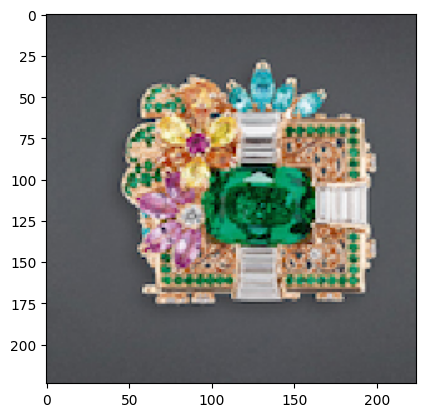

-----------------------------------------------------------------------
most similar products:
similarity score :  0.7224446
similarity score :  0.71262175
similarity score :  0.70688397
similarity score :  0.706805


<Figure size 400x400 with 0 Axes>

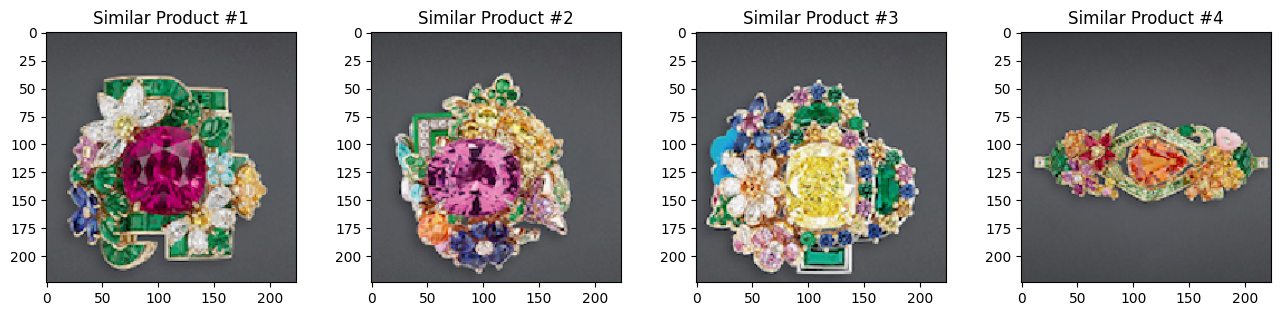

In [ ]:
import random

retrieve_most_similar_products(files[2])


original product:


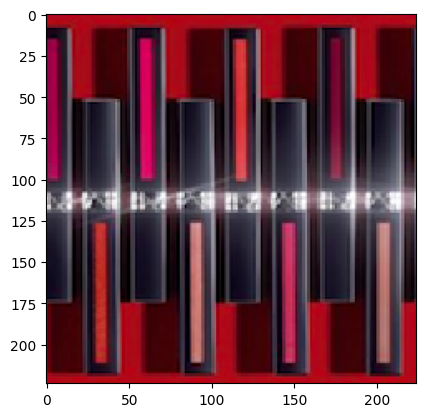

-----------------------------------------------------------------------
most similar products:
similarity score :  0.6369471
similarity score :  0.63434696
similarity score :  0.6332122
similarity score :  0.63293177


<Figure size 400x400 with 0 Axes>

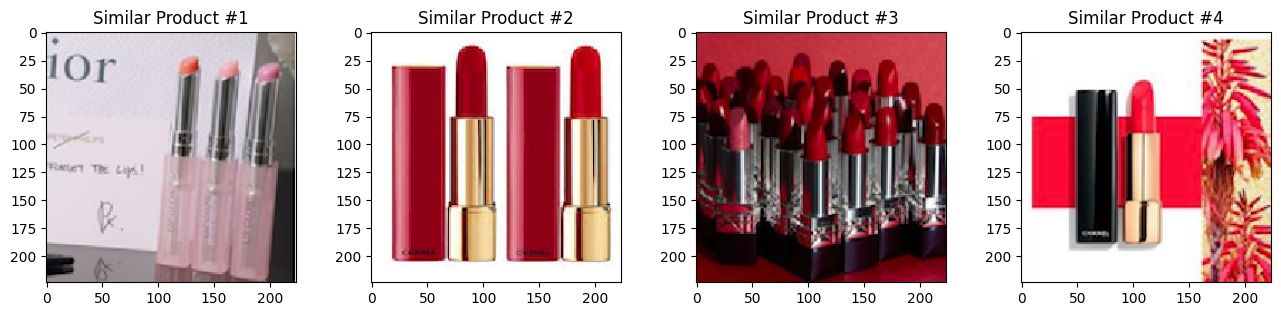

In [ ]:
retrieve_most_similar_products(files[5])

original product:


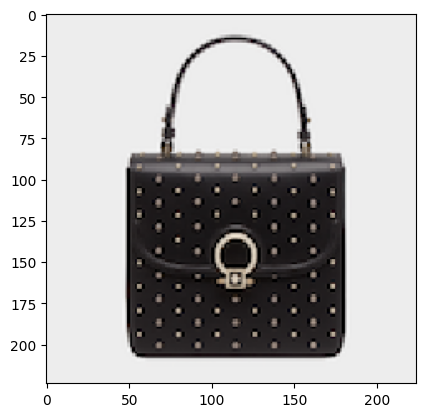

-----------------------------------------------------------------------
most similar products:
similarity score :  0.8060818
similarity score :  0.7985004
similarity score :  0.7982357
similarity score :  0.7943726


<Figure size 400x400 with 0 Axes>

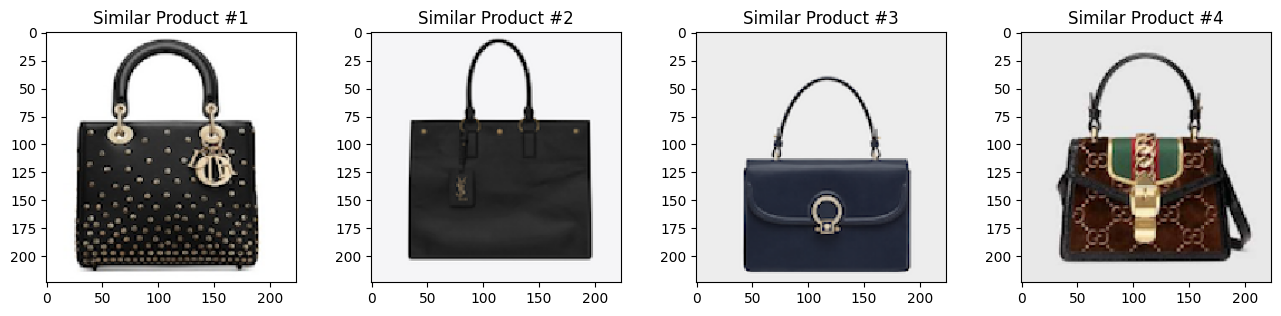

In [ ]:
retrieve_most_similar_products(files[3])

original product:


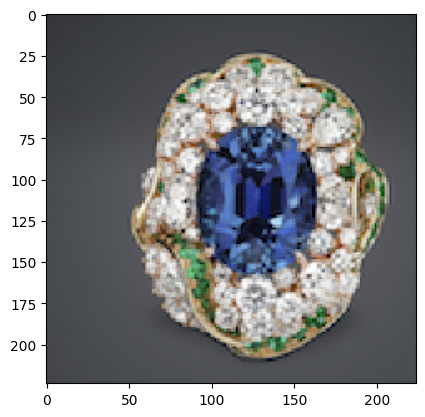

-----------------------------------------------------------------------
most similar products:
similarity score :  0.74645066
similarity score :  0.7367168
similarity score :  0.7205407
similarity score :  0.70598334


<Figure size 400x400 with 0 Axes>

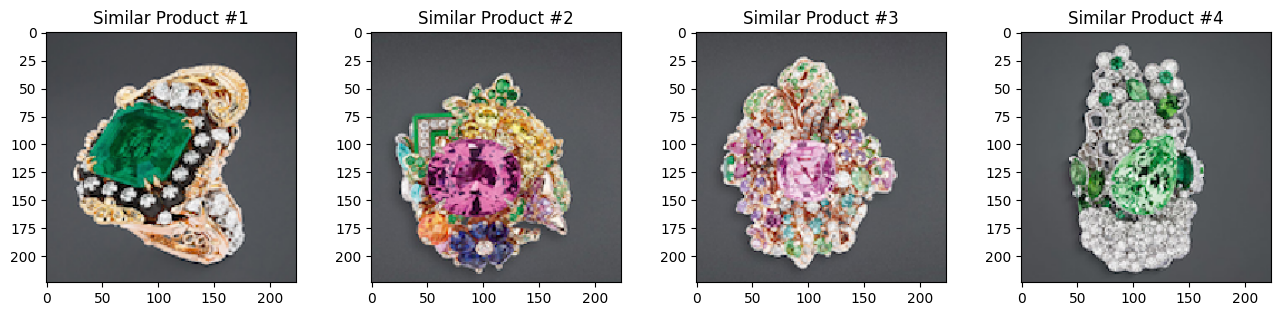

In [ ]:
retrieve_most_similar_products(files[21])

original product:


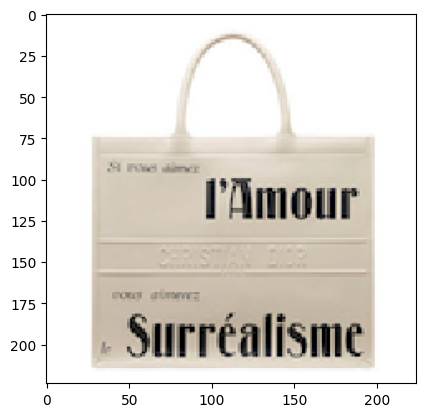

-----------------------------------------------------------------------
most similar products:
similarity score :  0.6721061
similarity score :  0.66468966
similarity score :  0.657723
similarity score :  0.6496094


<Figure size 400x400 with 0 Axes>

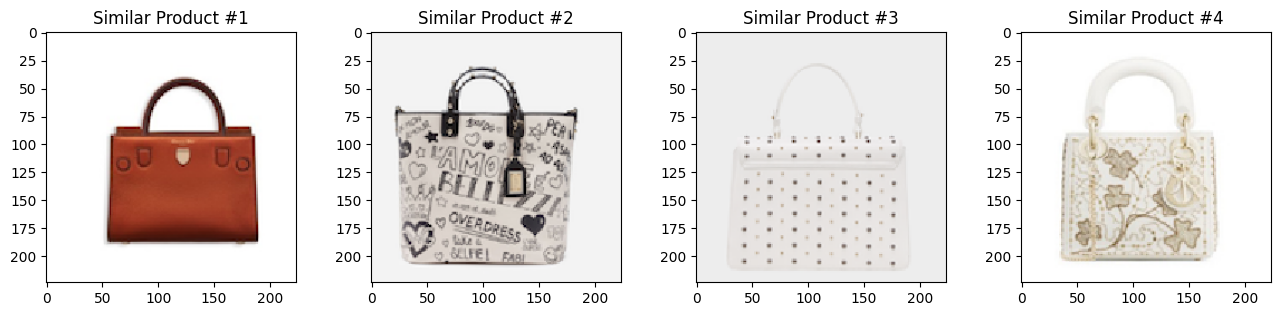

In [ ]:
retrieve_most_similar_products(files[39])

original product:


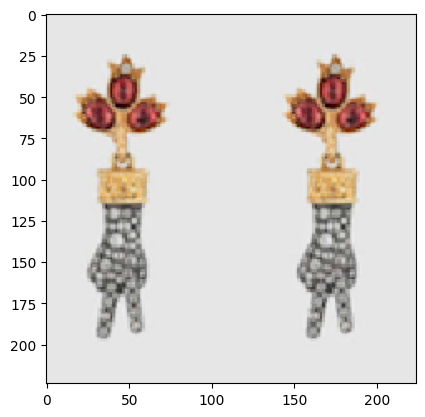

-----------------------------------------------------------------------
most similar products:
similarity score :  0.64476156
similarity score :  0.6428576
similarity score :  0.6353751
similarity score :  0.62685555


<Figure size 400x400 with 0 Axes>

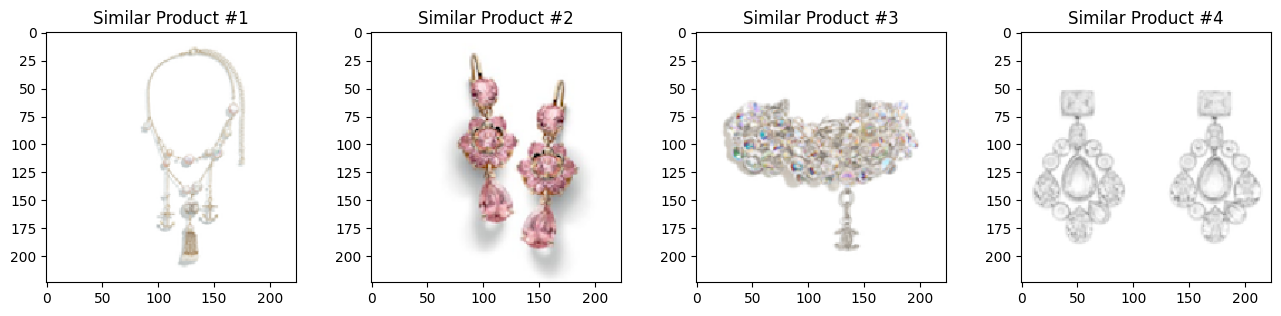

In [ ]:
retrieve_most_similar_products(files[25])